In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
df = pd.read_csv('out.csv')
#print(df.head(5))

#print(df.columns)

#print(df['External reset'])

#print(df.iloc[1])

#print(df.iloc[0,1])

#for index, row in df.iterrows():
#    print(index, row['External reset'])

#df.describe()

#df.loc[df['External reset'] == "deasserted"]

#df.iloc[:,0:10]



c:\users\mbanciso\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# initial plot

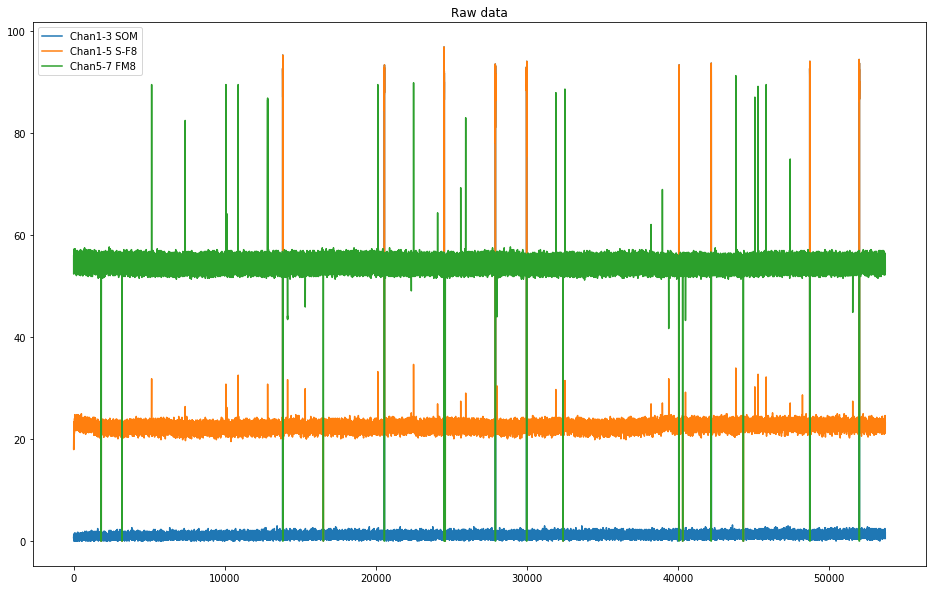

In [2]:
plt.figure(1,figsize=(16,10))
plt.title("Raw data")
plt.plot(df['phase_0'], label="Chan1-3 SOM")
plt.plot(df['phase_1'], label="Chan1-5 S-F8") 
plt.plot(df['phase_2'], label="Chan5-7 FM8")
plt.legend()
plt.draw()

init_len = len(df.index)


# removing ADRV9009 lockups

In [3]:
df_e1 = df.loc[df['External reset'] == 'deasserted'] # dataframe containing ADRV9009 lockups

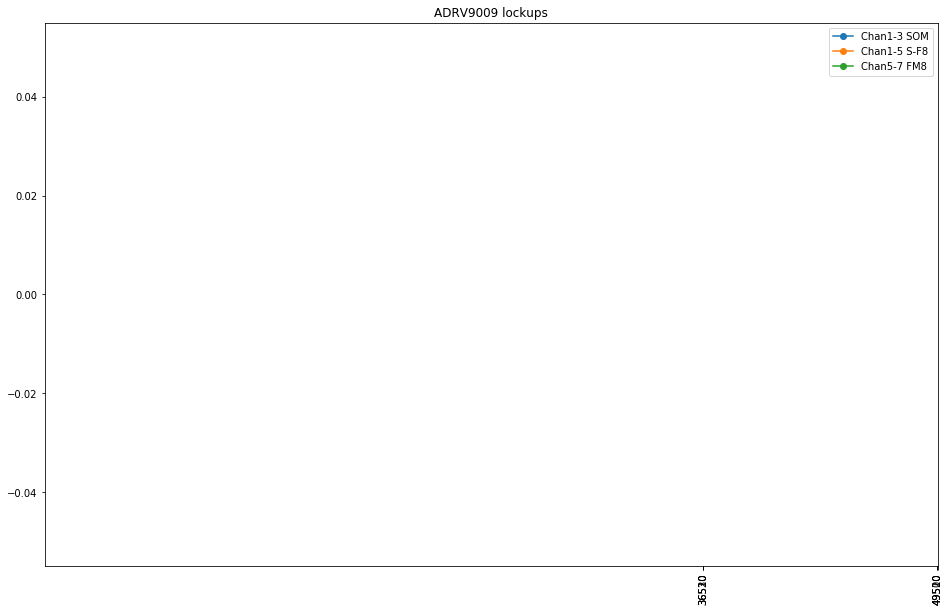

In [4]:
plt.figure(2,figsize=(16,10))
plt.title("ADRV9009 lockups")
plt.plot(df_e1['phase_0'], marker='o', label="Chan1-3 SOM")
plt.plot(df_e1['phase_1'], marker='o', label="Chan1-5 S-F8") 
plt.plot(df_e1['phase_2'], marker='o', label="Chan5-7 FM8")
plt.legend()
plt.xticks(df_e1.cnt[::10], rotation='vertical')
plt.draw()

df_e1.to_csv('out_e1.csv')

err1_len = len(df_e1.index)

initial length:             53727
ADRV9009 lockups:           60      0.11  %
check length  :             53727


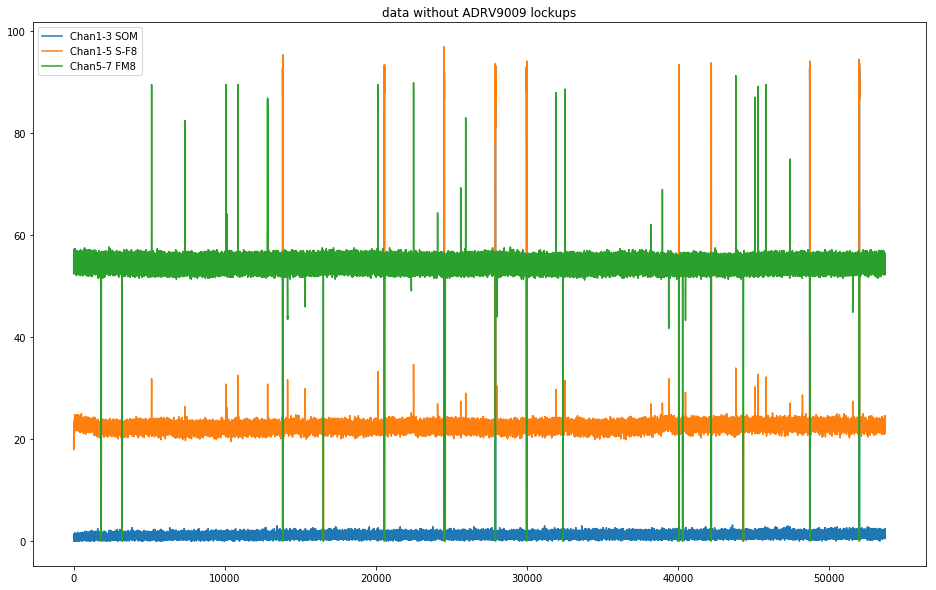

In [5]:
df = df.drop(df[(df['External reset'] == 'deasserted')].index)

plt.figure(3,figsize=(16,10))
plt.title("data without ADRV9009 lockups")
plt.plot(df['phase_0'], label="Chan1-3 SOM")
plt.plot(df['phase_1'], label="Chan1-5 S-F8") 
plt.plot(df['phase_2'], label="Chan5-7 FM8")
plt.legend()
plt.draw()

len1 = len(df.index)
print("initial length:            ", init_len)
print("ADRV9009 lockups:          ", err1_len, "    ", round((err1_len/init_len)*100, 2), " %" )
print("check length  :            ", err1_len + len1)

df.to_csv('out1.csv')

# removing Initial Frame Synchronization: No

In [6]:
df_e2 = df.loc[(df['Lane_0_Initial Frame Synchronization'] == 'No') | (df['Lane_1_Initial Frame Synchronization'] == 'No') \
               | (df['Lane_2_Initial Frame Synchronization'] == 'No') | (df['Lane_3_Initial Frame Synchronization'] == 'No') \
               | (df['Lane_4_Initial Frame Synchronization'] == 'No') | (df['Lane_5_Initial Frame Synchronization'] == 'No') \
               | (df['Lane_6_Initial Frame Synchronization'] == 'No') | (df['Lane_7_Initial Frame Synchronization'] == 'No')] 
# dataframe containing Initial Frame Synchronization: No

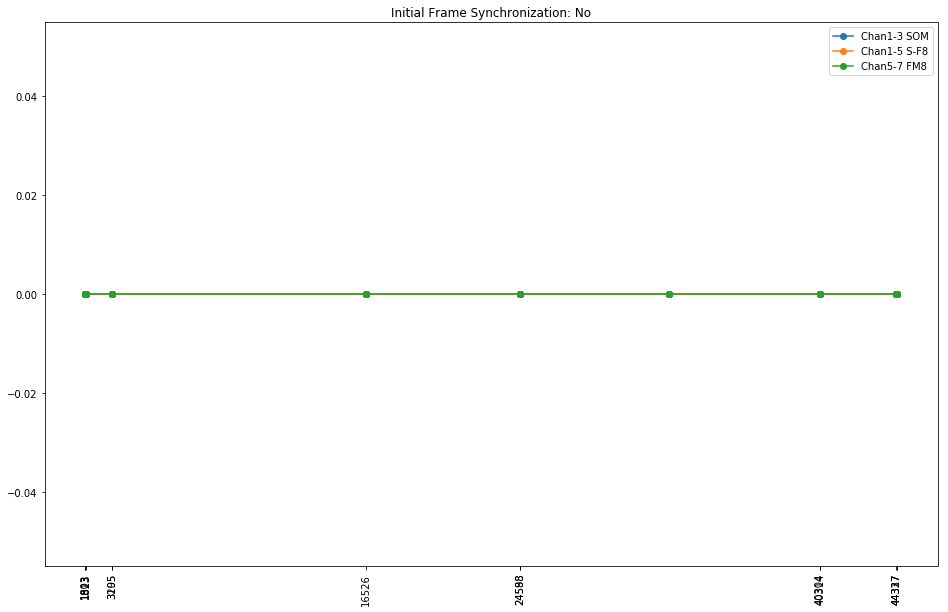

In [7]:
plt.figure(4,figsize=(16,10))
plt.title("Initial Frame Synchronization: No")
plt.plot(df_e2.index, df_e2['phase_0'], marker='o', label="Chan1-3 SOM")
plt.plot(df_e2.index, df_e2['phase_1'], marker='o', label="Chan1-5 S-F8") 
plt.plot(df_e2.index, df_e2['phase_2'], marker='o', label="Chan5-7 FM8")
plt.legend()
plt.xticks(df_e2.index[::10], rotation='vertical')
plt.draw()

df_e2.to_csv('out_e2.csv')

err2_len = len(df_e2.index)

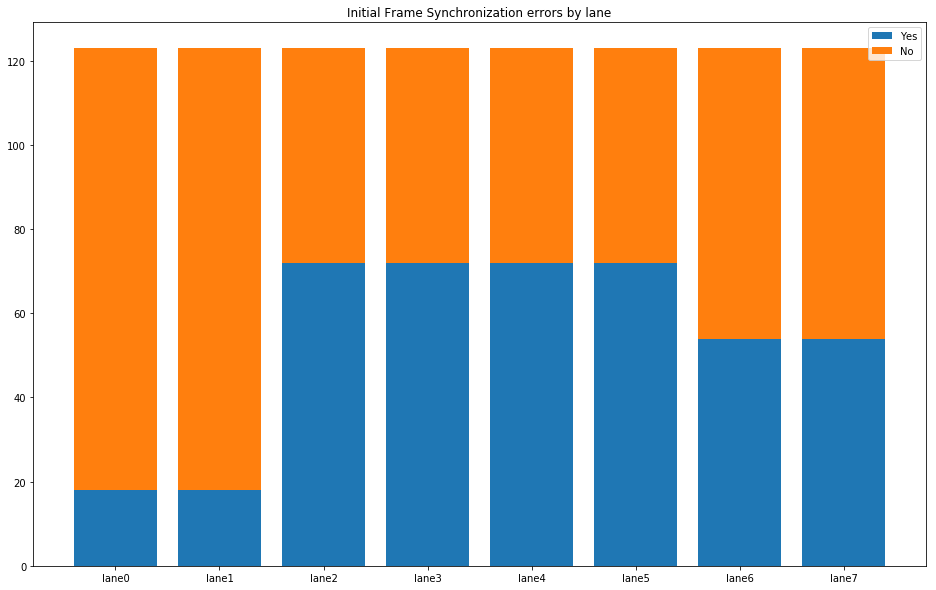

In [8]:
yes_no_list = []
for i in range(8):
    yes_no_dict = {"Yes": 0, "No": 0}
    yes_no_dict.update(df_e2['Lane_'+str(i)+"_Initial Frame Synchronization"].value_counts())
    yes_no_list.append(yes_no_dict)
#    print(yes_no_dict)

in_fr_sync_lanes=[]
in_fr_sync_yes=[]
in_fr_sync_no=[]

for i, raw in enumerate(yes_no_list):
    in_fr_sync_lanes.append("lane"+str(i))
    in_fr_sync_yes.append(raw.get('Yes'))
    in_fr_sync_no.append(raw.get('No'))

plt.figure(5,figsize=(16,10))
plt.bar(in_fr_sync_lanes, in_fr_sync_yes, label='Yes')
plt.bar(in_fr_sync_lanes, in_fr_sync_no, bottom=in_fr_sync_yes, label='No')
plt.title('Initial Frame Synchronization errors by lane')
plt.legend()
plt.draw()






initial length:             53727
Initial Frame Sync: No:     123      0.23  %
check length  :             53727


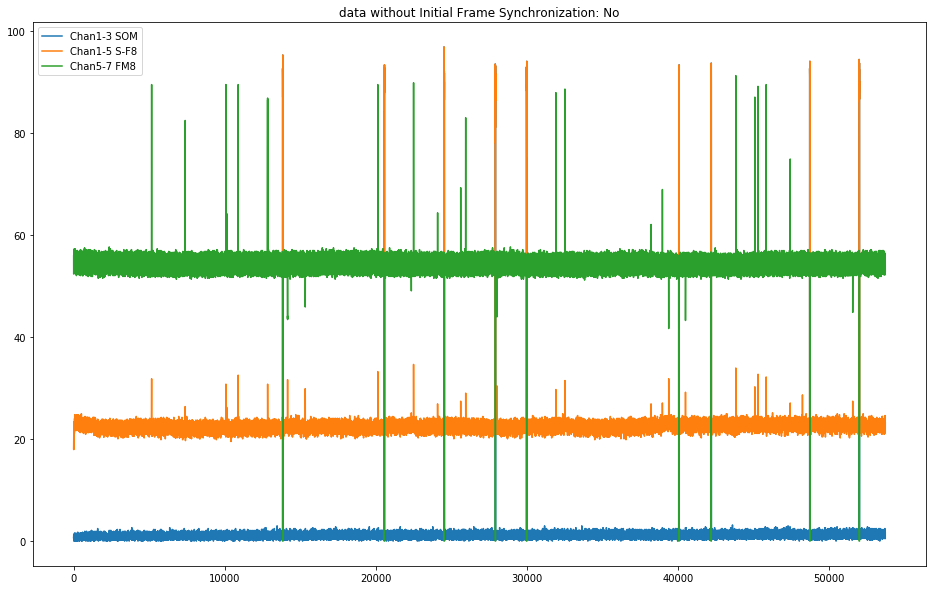

In [9]:
df = df.drop(df[(df['Lane_0_Initial Frame Synchronization'] == 'No') | (df['Lane_1_Initial Frame Synchronization'] == 'No') \
                | (df['Lane_2_Initial Frame Synchronization'] == 'No') | (df['Lane_3_Initial Frame Synchronization'] == 'No') \
                | (df['Lane_4_Initial Frame Synchronization'] == 'No') | (df['Lane_5_Initial Frame Synchronization'] == 'No') \
                | (df['Lane_6_Initial Frame Synchronization'] == 'No') | (df['Lane_7_Initial Frame Synchronization'] == 'No')].index)

# df['mean_0'] = [df['phase_0'].mean()] * len(df['phase_0'])
# df['mean_1'] = [df['phase_1'].mean()] * len(df['phase_1'])
# df['mean_2'] = [df['phase_2'].mean()] * len(df['phase_2'])


plt.figure(6,figsize=(16,10))
plt.title("data without Initial Frame Synchronization: No")
plt.plot(df['phase_0'], label="Chan1-3 SOM")
plt.plot(df['phase_1'], label="Chan1-5 S-F8") 
plt.plot(df['phase_2'], label="Chan5-7 FM8")
# plt.plot(df['mean_0'], label="mean 1-3 SOM")
# plt.plot(df['mean_1'], label="mean 1-5 S-F8")
# plt.plot(df['mean_2'], label="mean 5-7 FM8")

plt.legend()
plt.draw()

len1 = len(df.index)
print("initial length:            ", init_len)
print("Initial Frame Sync: No:    ", err2_len, "    ", round((err2_len/init_len)*100, 2), " %" )
print("check length  :            ", err2_len + err1_len + len1)

df.to_csv('out2.csv')

# removing Initial Lane Alignment Sequence: No

In [10]:
df_e3 = df.loc[(df['Lane_0_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_1_Initial Lane Alignment Sequence'] == 'No') \
               | (df['Lane_2_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_3_Initial Lane Alignment Sequence'] == 'No') \
               | (df['Lane_4_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_5_Initial Lane Alignment Sequence'] == 'No') \
               | (df['Lane_6_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_7_Initial Lane Alignment Sequence'] == 'No')] 
# dataframe containing Initial Frame Synchronization: No

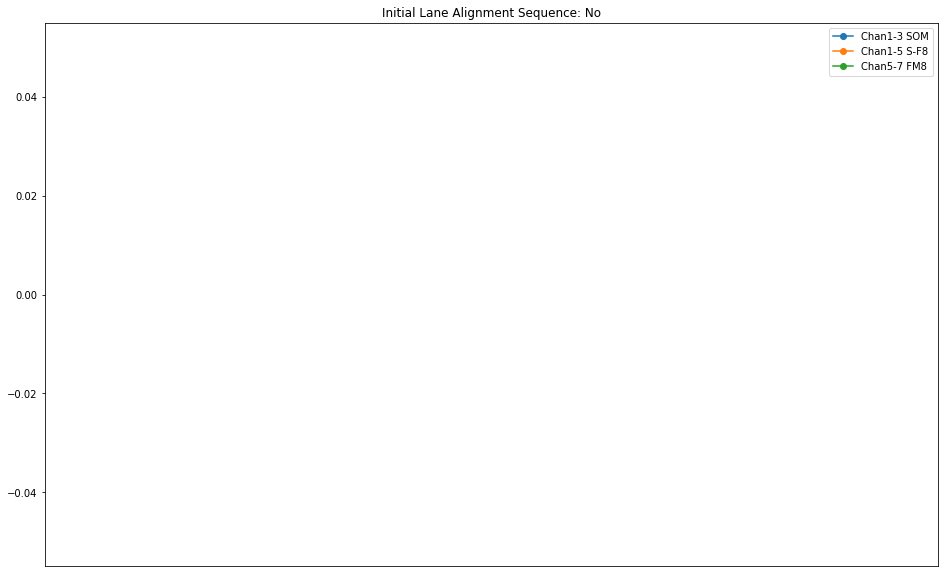

In [11]:
plt.figure(7,figsize=(16,10))
plt.title("Initial Lane Alignment Sequence: No")
plt.plot(df_e3['phase_0'], marker='o', label="Chan1-3 SOM")
plt.plot(df_e3['phase_1'], marker='o', label="Chan1-5 S-F8") 
plt.plot(df_e3['phase_2'], marker='o',label="Chan5-7 FM8")
plt.legend()
plt.xticks(df_e3.cnt[::10], rotation='vertical')
plt.draw()

df_e3.to_csv('out_e3.csv')

err3_len = len(df_e3.index)

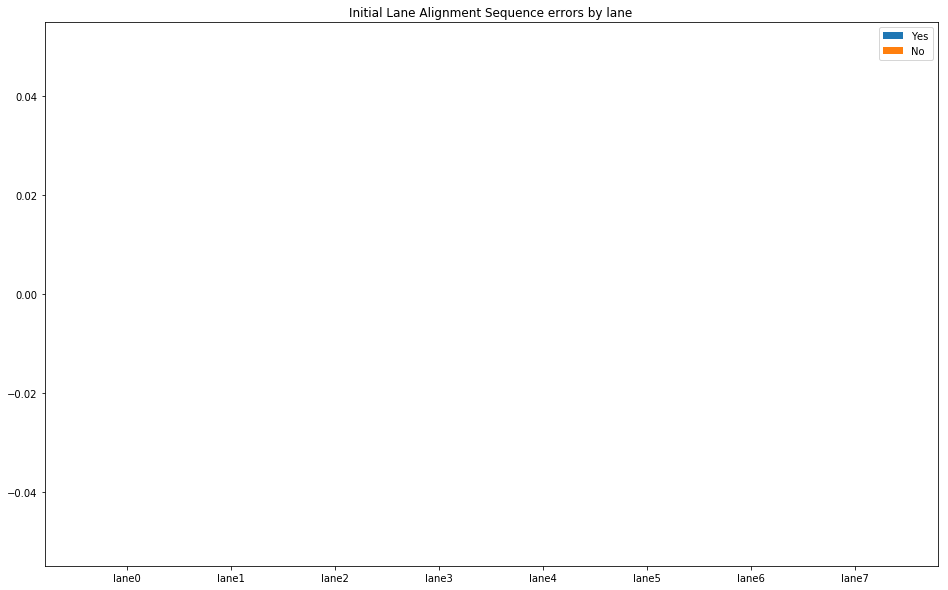

In [12]:
yes_no_list = []
for i in range(8):
    yes_no_dict = {"Yes": 0, "No": 0}
    yes_no_dict.update(df_e3['Lane_'+str(i)+"_Initial Lane Alignment Sequence"].value_counts())
    yes_no_list.append(yes_no_dict)
#    print(yes_no_dict)

in_la_ali_lanes=[]
in_la_ali_yes=[]
in_la_ali_no=[]

for i, raw in enumerate(yes_no_list):
    in_la_ali_lanes.append("lane"+str(i))
    in_la_ali_yes.append(raw.get('Yes'))
    in_la_ali_no.append(raw.get('No'))

plt.figure(8,figsize=(16,10))
plt.bar(in_la_ali_lanes, in_la_ali_yes, label='Yes')
plt.bar(in_la_ali_lanes, in_la_ali_no, bottom=in_la_ali_yes, label='No')
plt.title('Initial Lane Alignment Sequence errors by lane')
plt.legend()
plt.draw()

initial length:                       53727
Initial Lane Alignment Sequence: No:  0      0.0  %
check length  :                       53727


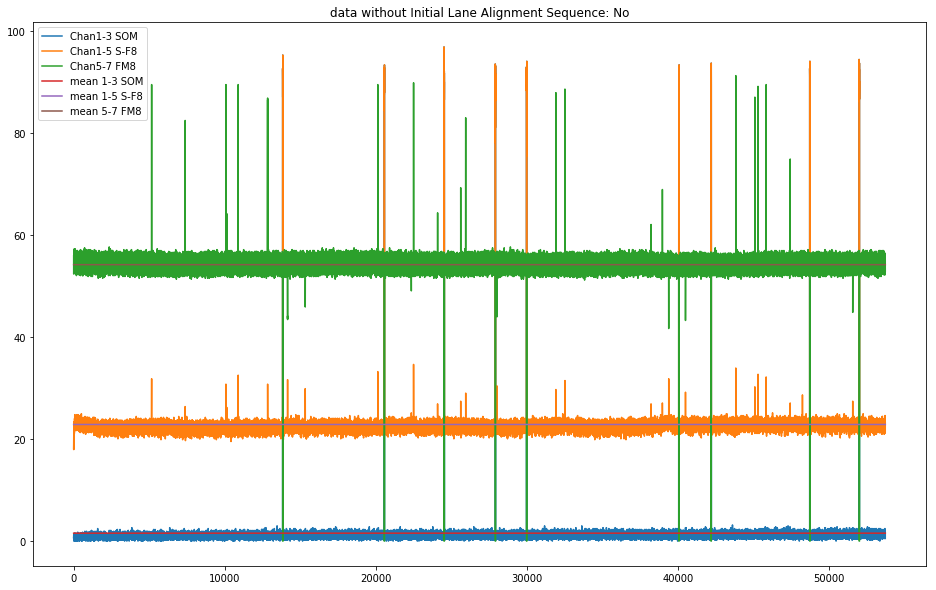

In [13]:
df = df.drop(df[(df['Lane_0_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_1_Initial Lane Alignment Sequence'] == 'No') \
                | (df['Lane_2_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_3_Initial Lane Alignment Sequence'] == 'No') \
                | (df['Lane_4_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_5_Initial Lane Alignment Sequence'] == 'No') \
                | (df['Lane_6_Initial Lane Alignment Sequence'] == 'No') | (df['Lane_7_Initial Lane Alignment Sequence'] == 'No')].index)

df['mean_0'] = [df['phase_0'].mean()] * len(df['phase_0'])
df['mean_1'] = [df['phase_1'].mean()] * len(df['phase_1'])
df['mean_2'] = [df['phase_2'].mean()] * len(df['phase_2'])


plt.figure(9,figsize=(16,10))
plt.title("data without Initial Lane Alignment Sequence: No")
plt.plot(df['phase_0'], label="Chan1-3 SOM")
plt.plot(df['phase_1'], label="Chan1-5 S-F8") 
plt.plot(df['phase_2'], label="Chan5-7 FM8")
plt.plot(df['mean_0'], label="mean 1-3 SOM")
plt.plot(df['mean_1'], label="mean 1-5 S-F8")
plt.plot(df['mean_2'], label="mean 5-7 FM8")

plt.legend()
plt.draw()

len1 = len(df.index)
print("initial length:                      ", init_len)
print("Initial Lane Alignment Sequence: No: ", err3_len, "    ", round((err3_len/init_len)*100, 2), " %" )
print("check length  :                      ", err3_len + err2_len + err1_len + len1)

df.to_csv('out2.csv')

# Plotting errors per lane

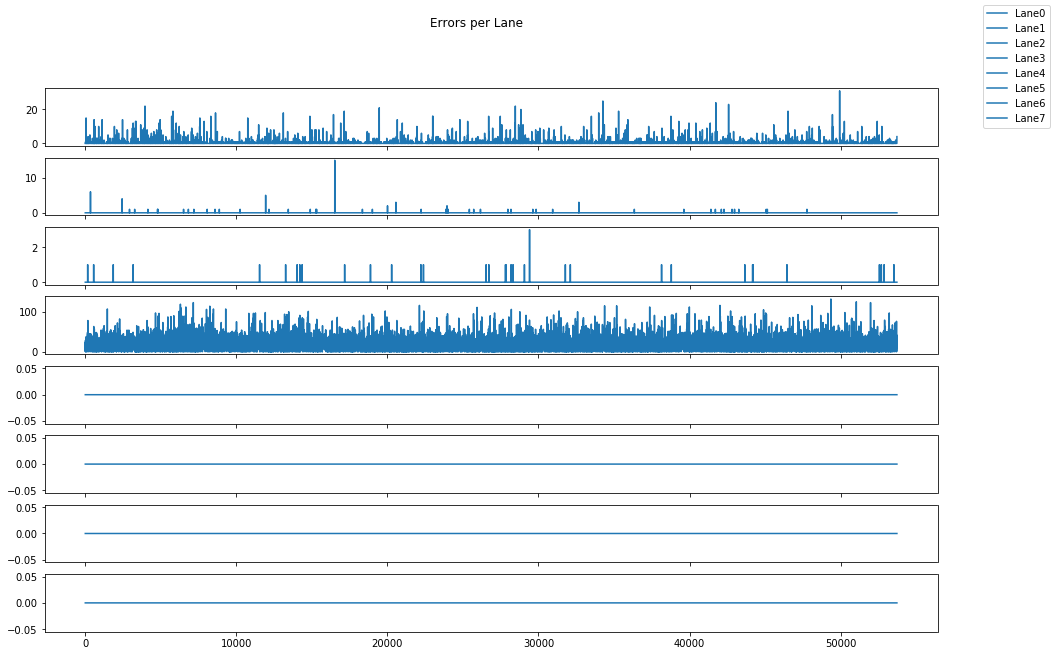

In [14]:
fig, axs = plt.subplots(8, sharex=True, figsize=(16,10), num = 10)
fig.suptitle('Errors per Lane')

for i in range(8):
     axs[i].plot(df['Lane_'+str(i)+'_Errors'], label="Lane"+str(i))

# axs[0].plot(df['Lane_0_Errors'])

fig.legend()
plt.draw()


# filtering the rest of the errors based on +-4 deg phase erros

In [15]:
ph_tol = 4

for i in range(3):
    df['phase_'+str(i)+"_err"] = np.where(((df['phase_'+str(i)] > df['mean_'+str(i)] + ph_tol) | (df['phase_'+str(i)] < df['mean_'+str(i)] - ph_tol)), 'yes', 'no')

# TODO: use for so it can be extended to multiple channels
df['phase_err'] = np.where((df['phase_0_err'] == 'yes') | (df['phase_1_err'] == 'yes') | (df['phase_2_err'] == 'yes'), 'yes', 'no')
    
#list(df.columns.values)

In [16]:
for i in range(3):
    print(df['phase_'+str(i)+"_err"].value_counts())
print(df['phase_err'].value_counts())

no     53274
yes      270
Name: phase_0_err, dtype: int64
no     53205
yes      339
Name: phase_1_err, dtype: int64
no     53194
yes      350
Name: phase_2_err, dtype: int64
no     53185
yes      359
Name: phase_err, dtype: int64


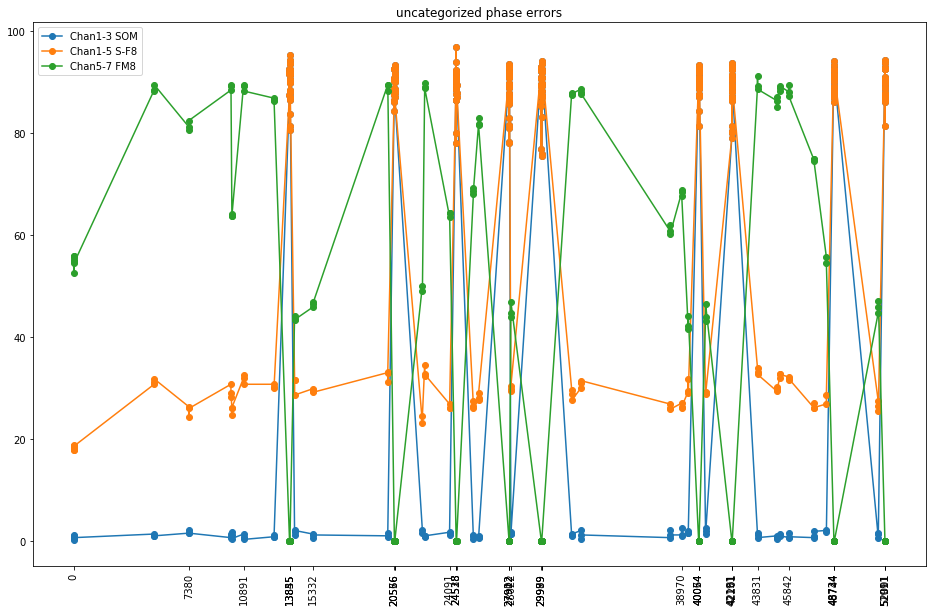

In [18]:
df_e4 = df.loc[df['phase_err'] == 'yes'] # dataframe containing uncategorized phase errors
plt.figure(11,figsize=(16,10))
plt.title("uncategorized phase errors")
plt.plot(df_e4['phase_0'], marker='o', label="Chan1-3 SOM")
plt.plot(df_e4['phase_1'], marker='o', label="Chan1-5 S-F8") 
plt.plot(df_e4['phase_2'], marker='o', label="Chan5-7 FM8")
plt.legend()
plt.xticks(df_e4.cnt[::10], rotation='vertical')
plt.draw()

df_e4.to_csv('out_e4.csv')

err4_len = len(df_e4.index)

initial length:             53727
other errors :           359      0.67  %
check length  :             53727


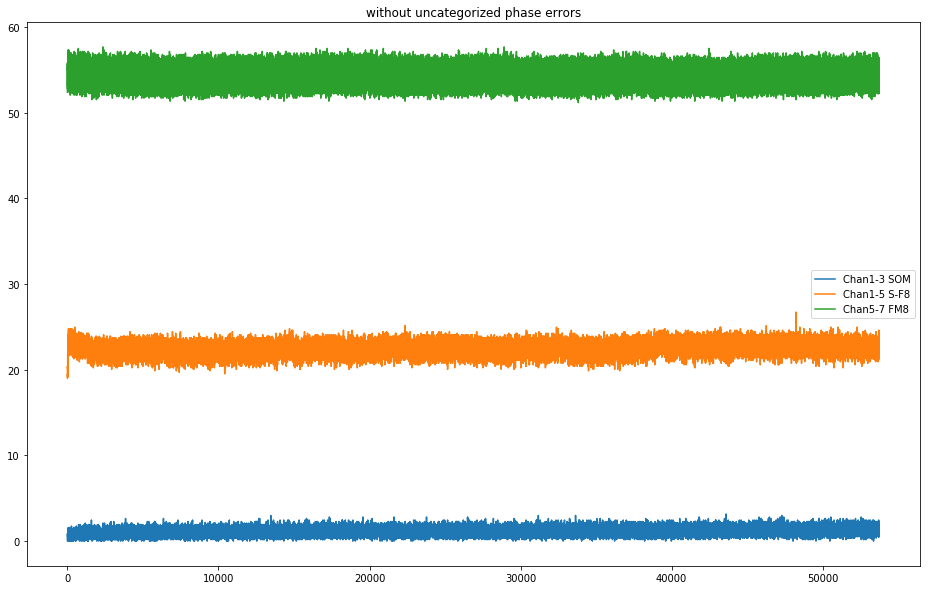

In [19]:
df = df.drop(df[(df['phase_err'] == 'yes')].index)

plt.figure(12,figsize=(16,10))
plt.title("without uncategorized phase errors")
plt.plot(df['phase_0'], label="Chan1-3 SOM")
plt.plot(df['phase_1'], label="Chan1-5 S-F8") 
plt.plot(df['phase_2'], label="Chan5-7 FM8")
plt.legend()
plt.draw()

len1 = len(df.index)
print("initial length:            ", init_len)
print("other errors :          ", err4_len, "    ", round((err4_len/init_len)*100, 2), " %" )
print("check length  :            ", err1_len + err2_len + err3_len + err4_len + len1)

df.to_csv('out3.csv')